In [61]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

#This model uses a neural network and GridSearchCV to classify whether prices will be up or down the following day

# Read the CSV and Perform Basic Data Cleaning

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [63]:
df_stock1 = pd.read_csv("./data/cba.csv")#,index_col="Date",parse_dates=True)
# Drop the null columns where all values are null
df_stock2 = df_stock1.dropna(axis='columns', how='all')
# Drop the null rows
df_stock3 = df_stock2.dropna()
# Drop the last rows to test prediction to actual
df_stock_less1= df_stock3.iloc[:-1,:]
# Drop last 2 columns RBA FED
N=2
df = df_stock_less1.iloc[: , :-N]
#df['Date'] = pd.to_datetime(df['Date'])
#df['Date'] = df['Date'].dt.date
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SENTIMENT
0,3/01/2000,26.088652,26.088652,26.088652,26.088652,7.993308,0,NEUTRAL
1,4/01/2000,26.058813,26.058813,25.720646,25.790268,7.901886,1018072,NEGATIVE
2,5/01/2000,25.353634,25.392424,25.113932,25.213392,7.725136,2191283,NEGATIVE
3,6/01/2000,25.362585,25.362585,24.666357,24.716087,7.572770,1505531,NEGATIVE
4,7/01/2000,24.913021,25.113932,24.735979,24.964741,7.648952,1414040,POSITIVE


In [64]:
df.shape

(5673, 8)

# Create a Train Test Split

Use `SENTIMENT` for the y values

In [65]:
X = df.drop("SENTIMENT", axis=1)
X = X.drop("Date", axis=1)
y = df["SENTIMENT"]#.values.reshape(-1, 1)
print(X.shape, y.shape)

(5673, 6) (5673,)


In [66]:
y

0        NEUTRAL
1       NEGATIVE
2       NEGATIVE
3       NEGATIVE
4       POSITIVE
          ...   
5668    NEGATIVE
5669    POSITIVE
5670    POSITIVE
5671    NEGATIVE
5672    NEGATIVE
Name: SENTIMENT, Length: 5673, dtype: object

In [67]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [68]:
X_train.head()

,Open,High,Low,Close,Adj Close,Volume
685,31.817612,31.827559,31.559013,31.588852,10.852307,2005953
2196,41.375824,41.694099,40.977982,41.574749,19.670418,5205993
4502,75.269997,75.959999,75.160004,75.800003,61.686932,4751356
789,27.520891,27.630299,27.282185,27.351807,9.642457,2250677
3244,53.619488,54.902538,53.619488,54.763290,34.299412,5046859


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [69]:
# Scale your X data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [70]:
# Label-encode y data set
label_encoder = LabelEncoder()
#label_encoder.fit(y_train)
encoded_y_train = label_encoder.fit_transform(y_train)
encoded_y_test = label_encoder.fit_transform(y_test)

In [71]:
encoded_y_train.dtype

dtype('int32')

In [72]:
from tensorflow.keras.utils import to_categorical

# One-hot encoding
# YOUR CODE HERE
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [73]:
y_train_categorical

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [74]:
for label, original_class in zip(y_train_categorical, y):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: NEUTRAL
Encoded Label: [1. 0. 0.]
------------
Original Class: NEGATIVE
Encoded Label: [0. 0. 1.]
------------
Original Class: NEGATIVE
Encoded Label: [0. 0. 1.]
------------
Original Class: NEGATIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: POSITIVE
Encoded Label: [0. 0. 1.]
------------
Original Class: POSITIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: NEGATIVE
Encoded Label: [0. 0. 1.]
------------
Original Class: POSITIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: NEGATIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: POSITIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: POSITIVE
Encoded Label: [0. 0. 1.]
------------
Original Class: NEGATIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: NEGATIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: POSITIVE
Encoded Label: [0. 0. 1.]
------------
Original Class: NEGATIVE
Encoded Label: [1. 0. 0.]
------------
Original Class: POSITIVE
Encoded Label: [

In [75]:
print(X_train_scaled.shape, y_train_categorical.shape)
df_y_train = pd.DataFrame(y_train_categorical)
df_y_train

(4254, 6) (4254, 3)


,0,1,2
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
4249,0.0,0.0,1.0
4250,0.0,0.0,1.0
4251,1.0,0.0,0.0
4252,0.0,0.0,1.0


# Select your features (columns)

In [76]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(X_train_scaled)
selector.fit_transform(y_train_categorical)
print(X_train_scaled.shape, y_train_categorical.shape)

(4254, 6) (4254, 3)


In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
select = SelectKBest(chi2, k=6)
train_new_xy = select.fit_transform(X_train_scaled, y_train_categorical)
filter = select.get_support()
cols = X.columns.array
features = cols#[1:]
print(features)
print(features[filter])
X_train_scaled.shape


<PandasArray>
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
Length: 6, dtype: object
<PandasArray>
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
Length: 6, dtype: object


(4254, 6)

In [78]:
#In X keep only columns featured
X_train_featured = X_train_scaled[:,[0,1,2,3,4,5]]
X_test_featured = X_test_scaled[:,[0,1,2,3,4,5]]
X_train_featured_df = pd.DataFrame(X_train_featured)
X_train_featured_df 

,0,1,2,3,4,5
0,0.107318,0.105679,0.107083,0.104551,0.037876,0.056327
1,0.216453,0.218282,0.215309,0.218400,0.125035,0.146184
2,0.603455,0.609346,0.608068,0.608603,0.540331,0.133418
3,0.058258,0.057777,0.057942,0.056244,0.025918,0.063199
4,0.356251,0.369025,0.360563,0.368763,0.269630,0.141715
...,...,...,...,...,...,...
4249,0.087671,0.090014,0.090284,0.090490,0.039368,0.057272
4250,0.421567,0.420010,0.418365,0.416952,0.474811,0.093071
4251,0.686154,0.684473,0.678727,0.675612,0.503781,0.108644
4252,0.094940,0.095917,0.094169,0.097520,0.029015,0.031537


In [79]:
print(X_train_featured.shape, y_train_categorical.shape)
print(X_test_featured.shape, y_test_categorical.shape)

(4254, 6) (4254, 3)
(1419, 6) (1419, 3)


In [80]:
X_train_featured.shape
y_train_categorical.shape

(4254, 3)

# Train the Model

In [102]:
# Created a normal neural network with 6 inputs, 4 hidden nodes, and 3 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=6))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 6)                 42        
                                                                 
 dense_31 (Dense)            (None, 100)               700       
                                                                 
 dense_32 (Dense)            (None, 100)               10100     
                                                                 
 dense_33 (Dense)            (None, 100)               10100     
                                                                 
 dense_34 (Dense)            (None, 100)               10100     
                                                                 
 dense_35 (Dense)            (None, 3)                 303       
                                                                 
Total params: 31,345
Trainable params: 31,345
Non-trai

In [103]:
# Compile the model
# YOUR CODE HERE
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [104]:
y_train_categorical.reshape(-1, 1)
y_test_categorical.reshape(-1, 1)

print(X_train_featured.shape, y_train_categorical.shape)
print(X_test_featured.shape, y_test_categorical.shape)

(4254, 6) (4254, 3)
(1419, 6) (1419, 3)


In [105]:
# Fit the model to the training data
# YOUR CODE HERE

model.fit(
    X_train_featured,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
133/133 - 0s - loss: 0.8035 - accuracy: 0.5087 - 471ms/epoch - 4ms/step
Epoch 2/100
133/133 - 0s - loss: 0.7713 - accuracy: 0.5092 - 198ms/epoch - 1ms/step
Epoch 3/100
133/133 - 0s - loss: 0.7699 - accuracy: 0.5078 - 164ms/epoch - 1ms/step
Epoch 4/100
133/133 - 0s - loss: 0.7692 - accuracy: 0.5096 - 155ms/epoch - 1ms/step
Epoch 5/100
133/133 - 0s - loss: 0.7684 - accuracy: 0.5059 - 182ms/epoch - 1ms/step
Epoch 6/100
133/133 - 0s - loss: 0.7676 - accuracy: 0.5155 - 142ms/epoch - 1ms/step
Epoch 7/100
133/133 - 0s - loss: 0.7652 - accuracy: 0.5162 - 129ms/epoch - 973us/step
Epoch 8/100
133/133 - 0s - loss: 0.7635 - accuracy: 0.5148 - 125ms/epoch - 941us/step
Epoch 9/100
133/133 - 0s - loss: 0.7621 - accuracy: 0.5181 - 134ms/epoch - 1ms/step
Epoch 10/100
133/133 - 0s - loss: 0.7576 - accuracy: 0.5284 - 130ms/epoch - 976us/step
Epoch 11/100
133/133 - 0s - loss: 0.7542 - accuracy: 0.5308 - 133ms/epoch - 1ms/step
Epoch 12/100
133/133 - 0s - loss: 0.7477 - accuracy: 0.5336 - 129ms/

In [106]:
model_loss, model_accuracy = model.evaluate(X_train_featured, y_train_categorical, verbose=2)
print(f"Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

133/133 - 0s - loss: 0.4909 - accuracy: 0.7920 - 287ms/epoch - 2ms/step
Neural Network - Loss: 0.49092793464660645, Accuracy: 0.7919605374336243


In [107]:
print(f"Training Data Score: {model.evaluate(X_train_featured, y_train_categorical)}")
print(f"Testing Data Score: {model.evaluate(X_test_featured, y_test_categorical)}")

133/133 [==============================] - 0s 927us/step - loss: 0.4909 - accuracy: 0.7920
Training Data Score: [0.49092793464660645, 0.7919605374336243]
45/45 [==============================] - 0s 1ms/step - loss: 0.5322 - accuracy: 0.7703
Testing Data Score: [0.5322115421295166, 0.770260751247406]


# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("./data/cba.csv")

# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SENTIMENT,RBA,FED
0,3/01/2000,26.088652,26.088652,26.088652,26.088652,7.993308,0,NEUTRAL,4.98,5.87
1,4/01/2000,26.058813,26.058813,25.720646,25.790268,7.901886,1018072,NEGATIVE,4.98,5.87
2,5/01/2000,25.353634,25.392424,25.113932,25.213392,7.725136,2191283,NEGATIVE,4.98,5.87
3,6/01/2000,25.362585,25.362585,24.666357,24.716087,7.572770,1505531,NEGATIVE,4.98,5.87
4,7/01/2000,24.913021,25.113932,24.735979,24.964741,7.648952,1414040,POSITIVE,4.98,5.87


In [88]:
# Drop extra y column koi_disposition
X_data = df.drop(columns=['SENTIMENT'], axis=1)
y_target = df['SENTIMENT']
print(X_data.shape,y_target.shape)

(5674, 9) (5674,)


In [89]:
#In X_data keep only featured cols 

X_data_featured = X_data.iloc[:,[1,2,3,4,5,6]]
print(X_data_featured.shape,y_target.shape)

(5674, 6) (5674,)


In [90]:
# Split data and target into training and testing
from sklearn.model_selection import train_test_split
X_data_train, X_data_test, y_target_train, y_target_test = train_test_split(X_data_featured,y_target,test_size=0.4,random_state=42)
print(X_data_train.shape,y_target_train.shape)
print(X_data_test.shape,y_target_test.shape)

(3404, 6) (3404,)
(2270, 6) (2270,)


In [91]:
y_target_train

4681    NEGATIVE
2436    POSITIVE
4054    POSITIVE
4535    POSITIVE
3112    NEGATIVE
          ...   
3772    NEGATIVE
5191    NEGATIVE
5226    POSITIVE
5390    POSITIVE
860      NEUTRAL
Name: SENTIMENT, Length: 3404, dtype: object

In [92]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X_scaler = MinMaxScaler().fit(X_data_train)
X_data_train_scaled = X_scaler.transform(X_data_train)
X_data_test_scaled = X_scaler.transform(X_data_test)

In [93]:
#Label-encode data set
label_encoder = LabelEncoder()
y_target_train_encoded = label_encoder.fit_transform(y_target_train)
y_target_test_encoded = label_encoder.fit_transform(y_target_test)

In [94]:
print(X_data_train_scaled.shape,y_target_train_encoded.shape)
print(X_data_test_scaled.shape,y_target_test_encoded.shape)

(3404, 6) (3404,)
(2270, 6) (2270,)


In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [96]:

model_params = {
    'n_neighbors' : {
        'model' : KNeighborsClassifier(),
        'params' : {
           'n_neighbors': [3,5,11,19],
           'weights': ['uniform','distance']
        }
    },
    'svm' : {
        'model' : svm.SVC(),
        'params' : {
            'C' : [1,5,10,50],
            'kernel': ['rbf','linear'],
            'gamma': [0.0001, 0.0005, 0.001, 0.005]
        }
    },
    'random_forest': {
        'model' : RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,50,80],
            'max_features': ['auto','sqrt'],
            'max_depth': [2,4],
            'min_samples_split': [2,5],
            'min_samples_leaf': [1,2],
            'bootstrap': [True,False]
        }
    },
    'logistic_regression' : {
    'model' : LogisticRegression(solver='liblinear',multi_class='auto'),
    'params' : { 'C': [1,5,10,50]
    }
  }
}

In [97]:
from sklearn.model_selection import GridSearchCV
scores= []
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_data_train_scaled, y_target_train_encoded)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_})

In [98]:
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_score

,model,best_score,best_params
0,n_neighbors,0.539657,"{'n_neighbors': 3, 'weights': 'distance'}"
1,svm,0.734144,"{'C': 50, 'gamma': 0.0001, 'kernel': 'linear'}"
2,random_forest,0.546415,"{'bootstrap': True, 'max_depth': 4, 'max_featu..."
3,logistic_regression,0.774389,{'C': 50}


In [99]:
# Make predictions with the hypertuned model
predictions_clf = clf.predict(X_data_test_scaled)

from sklearn.metrics import classification_report
target_names = ["NEGATIVE 0","NEUTRAL 1","POSITIVE 2"] 
print(classification_report(y_target_test_encoded, predictions_clf, target_names=target_names))

              precision    recall  f1-score   support

  NEGATIVE 0       0.83      0.72      0.77      1042
   NEUTRAL 1       0.00      0.00      0.00        51
  POSITIVE 2       0.76      0.88      0.81      1177

    accuracy                           0.78      2270
   macro avg       0.53      0.53      0.53      2270
weighted avg       0.77      0.78      0.77      2270



C:\Users\antoi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antoi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\antoi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


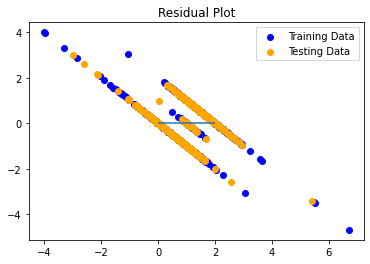

In [100]:
# LinearRegression model: fit it to the scaled training data
from sklearn.linear_model import LinearRegression
modelLG1 = LinearRegression()
modelLG1.fit(X_data_train_scaled, y_target_train_encoded)

# Make predictions using fitted model
predictions1 = modelLG1.predict(X_data_train_scaled)

# Plotted the difference between the model predicted values and actual y values, versus the model predicted values
plt.scatter(modelLG1.predict(X_data_train_scaled), y_target_train_encoded - modelLG1.predict(X_data_train_scaled), c="blue", label="Training Data")
plt.scatter(modelLG1.predict(X_data_test_scaled), y_target_test_encoded - modelLG1.predict(X_data_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_target_test_encoded.min(), xmax=y_target_test_encoded.max())
plt.title("Residual Plot")
plt.show()

# Save the Model

In [101]:
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'sentiment.sav'
joblib.dump(model, filename)

INFO:tensorflow:Assets written to: ram://4bb24009-77be-4078-9151-c12e89860b14/assets


['sentiment.sav']